In [1]:
'''
PROYECTO FINAL - ANALISIS Y PROCESAMIENTO INTELIGENTE DE TEXTOS

SEMESTR 2023-2

INTEGRANTES:

* RIOS NUÑEZ HUBERTO
* DOMINGUEZ FUENTES LUIS MARIO

'''


#bibliotecas utilizadas para extraer, limpiar y manipular los datos
from funciones import *
import pandas as pd 
import numpy as np
import seaborn as sns
import gensim


from gensim import corpora
from gensim.corpora.dictionary import Dictionary

 
# Para trazar los graficos
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.show('seaborn')

#biblioteca utilizada para contar la frecuencia de las palabras
from sklearn.feature_extraction.text import CountVectorizer

#Para crear el modelo de análisis de sentimiento, tokenización y lematización
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [2]:
#Extrae la información de las 50 canciones más populares de Bon Jovi usando la función creada en el script de ayudantes
access_token = 'lT2z6ewZh_lM4r8FSNZnVQblUZf0NMqgELitzgXw5mMHYuDNEZVxTSPhcS8bGt39'
df0 = search_data('Bon Jovi', 50, access_token)

Searching for songs by Bon Jovi...

Song 1: "Livin’ on a Prayer"
Song 2: "It’s My Life"
Song 3: "You Give Love a Bad Name"
Song 4: "Wanted Dead or Alive"
Song 5: "Always"
Song 6: "I’ll Be There for You"
Song 7: "Bed of Roses"
Song 8: "Runaway"
Song 9: "Bad Medicine"
Song 10: "Thank You for Loving Me"
Song 11: "This Ain’t a Love Song"
Song 12: "Never Say Goodbye"
Song 13: "Have a Nice Day"
Song 14: "Shot Through the Heart"
Song 15: "Keep the Faith"
Song 16: "These Days"
Song 17: "Walls"
Song 18: "Born to Be My Baby"
Song 19: "Do What You Can"
Song 20: "Unbroken"
Song 21: "In These Arms"
Song 22: "Story of Love"
Song 23: "This House Is Not for Sale"
Song 24: "Someday I’ll Be Saturday Night"
Song 25: "I’d Die for You"
Song 26: "Who Says You Can’t Go Home?"
Song 27: "Roller Coaster"
Song 28: "I’ll Sleep When I’m Dead"
Song 29: "Limitless"
Song 30: "American Reckoning"
Song 31: "(You Want To) Make a Memory"
Song 32: "Lay Your Hands on Me"
Song 33: "Hallelujah"
Song 34: "Let It Rain"
Song 35

In [3]:
#Observamos la informacion de el artista, el titulo, la fecha y la letra
df0.head(10)

,artist,title,date,lyric
0,Bon Jovi,Livin’ on a Prayer,1986,84 ContributorsTranslationsPortuguêsLivin’ on ...
1,Bon Jovi,It’s My Life,2000,54 ContributorsTranslationsPortuguêsΕλληνικάIt...
2,Bon Jovi,You Give Love a Bad Name,1986,60 ContributorsTranslationsPortuguêsYou Give L...
3,Bon Jovi,Wanted Dead or Alive,1986,36 ContributorsTranslationsPortuguêsWanted Dea...
4,Bon Jovi,Always,1994,33 ContributorsTranslationsPortuguêsΕλληνικάAl...
5,Bon Jovi,I’ll Be There for You,1950,16 ContributorsTranslationsPortuguêsI’ll Be Th...
6,Bon Jovi,Bed of Roses,1992,24 ContributorsTranslationsPortuguêsBed of Ros...
7,Bon Jovi,Runaway,1984,27 ContributorsTranslationsPortuguêsRunaway Ly...
8,Bon Jovi,Bad Medicine,1988,24 ContributorsTranslationsPortuguêsBad Medici...
9,Bon Jovi,Thank You for Loving Me,2000,12 ContributorsTranslationsΕλληνικάThank You f...


In [4]:
#Limpiamos y transformamos los datos usando funciones creadas en el script de ayudantes
df = clean_lyrics(df0,'lyric')
df = create_decades(df)

#Filtramos los datos para usar canncinoes que si tienen letras
df = df[df['lyric'].notnull()]


#Guaramos la informacion en un archivo cvs
df.to_csv('lyrics.csv',index=False)

In [5]:
#Mostramos los 50 titulos, ahora tambien por su decada 
df.head(50)

,artist,title,decade,date,lyric
0,Bon Jovi,Livin’ on a Prayer,80s,1986,84 contributorstranslationsportuguêslivin’ on ...
1,Bon Jovi,It’s My Life,00s,2000,54 contributorstranslationsportuguêsελληνικάit...
2,Bon Jovi,You Give Love a Bad Name,80s,1986,60 contributorstranslationsportuguêsyou give l...
3,Bon Jovi,Wanted Dead or Alive,80s,1986,36 contributorstranslationsportuguêswanted dea...
4,Bon Jovi,Always,90s,1994,33 contributorstranslationsportuguêsελληνικάal...
5,Bon Jovi,I’ll Be There for You,50s,1950,16 contributorstranslationsportuguêsi’ll be th...
6,Bon Jovi,Bed of Roses,90s,1992,24 contributorstranslationsportuguêsbed of ros...
7,Bon Jovi,Runaway,80s,1984,27 contributorstranslationsportuguêsrunaway ly...
8,Bon Jovi,Bad Medicine,80s,1988,24 contributorstranslationsportuguêsbad medici...
9,Bon Jovi,Thank You for Loving Me,00s,2000,12 contributorstranslationsελληνικάthank you f...


In [6]:
def unique(list1): 
     # Se inicializa una lista vacia
    unique_list = [] 
      
    # iteramos por todos los elementos
    for x in list1: 
        # comprobamos si existe en unique_list o no
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [7]:
#Almacena palabras únicas de cada canción con letras en una nueva columna llamada palabras

#lista utilizada para almacenar las palabras
words = []
#iteramos a través de cada letra y dividir palabras únicas agregando el resultado a la lista de palabras
df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#creamos la nueva columna con la información de las listas de palabras
df['words'] = words

In [8]:
#Mostramos la información 
df.head(10)

,artist,title,decade,date,lyric,words
0,Bon Jovi,Livin’ on a Prayer,80s,1986,84 contributorstranslationsportuguêslivin’ on ...,"[84, contributorstranslationsportuguêslivin’, ..."
1,Bon Jovi,It’s My Life,00s,2000,54 contributorstranslationsportuguêsελληνικάit...,"[54, contributorstranslationsportuguêsελληνικά..."
2,Bon Jovi,You Give Love a Bad Name,80s,1986,60 contributorstranslationsportuguêsyou give l...,"[60, contributorstranslationsportuguêsyou, giv..."
3,Bon Jovi,Wanted Dead or Alive,80s,1986,36 contributorstranslationsportuguêswanted dea...,"[36, contributorstranslationsportuguêswanted, ..."
4,Bon Jovi,Always,90s,1994,33 contributorstranslationsportuguêsελληνικάal...,"[33, contributorstranslationsportuguêsελληνικά..."
5,Bon Jovi,I’ll Be There for You,50s,1950,16 contributorstranslationsportuguêsi’ll be th...,"[16, contributorstranslationsportuguêsi’ll, ly..."
6,Bon Jovi,Bed of Roses,90s,1992,24 contributorstranslationsportuguêsbed of ros...,"[24, contributorstranslationsportuguêsbed, ros..."
7,Bon Jovi,Runaway,80s,1984,27 contributorstranslationsportuguêsrunaway ly...,"[27, contributorstranslationsportuguêsrunaway,..."
8,Bon Jovi,Bad Medicine,80s,1988,24 contributorstranslationsportuguêsbad medici...,"[24, contributorstranslationsportuguêsbad, med..."
9,Bon Jovi,Thank You for Loving Me,00s,2000,12 contributorstranslationsελληνικάthank you f...,"[12, contributorstranslationsελληνικάthank, lo..."


In [9]:
#Se crea un nuevo marco de datos de todas las palabras utilizadas en las letras y sus décadas.

#Lista utilizada para almacenar la información
set_words = []
set_decades = []

#Iteramos a través de cada palabra y década y almacenarlos en las nuevas listas
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

#Creamos el nuevo marco de datos con la información de las listas de palabras y décadas
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [10]:
#Definimos sus propias palabras vacías en caso de que la función de limpieza de datos no las elimine todas.
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah"]

#Cuenta la frecuencia de cada palabra que no tiene en las listas stop_words
cv = CountVectorizer(stop_words=stop_words)

#Se crea un marco de datos llamado data_cv para almacenar la cantidad de veces que se usó la palabra en una letra según sus décadas
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names_out())
data_cv['decade'] = words_df['decade']

#Se crea un marco de datos que suma la frecuencia de ocurrencia de cada palabra y agrupa el resultado por década
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Se guarda la informacion en un archivo csv
vect_words.to_csv('words.csv',index=False)

#Se cambia el orden de las columnas para ordenar de la década más antigua a la actual
vect_words = vect_words[['words','80s','90s','00s','10s']]

In [11]:
vect_words

,words,80s,90s,00s,10s
0,10,0,1,0,4
1,11,1,0,1,1
2,12,0,1,2,0
3,13,0,0,1,0
4,14,0,0,1,1
...,...,...,...,...,...
1605,you,3,2,1,2
1606,you2embed,0,0,0,0
1607,young,1,0,0,2
1608,younger,0,0,0,1


In [12]:
# Se usa para mostrar en un grafico las palabras mas usadas por decada
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

# Determona la frecucnia de las palabras mas usadas
def plot_freq_words(df,decade,n_words):
    
    top_words_2023 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2023['words'],top_words_2023[df.columns[1]])
    plt.plot(top_words_2023['words'],top_words_2023[df.columns[2]])
    plt.plot(top_words_2023['words'],top_words_2023[df.columns[3]])
    plt.plot(top_words_2023['words'],top_words_2023[df.columns[4]])

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Mas frecuentes palabras {decade} comparadas con otras decadas",fontsize=14)
    plt.xlabel(f'Mas frecuntes palabras de {decade}',fontsize=12)
    plt.ylabel('Frecuencia',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [13]:
# Muestra las estadisticas de las palabras
words_stats(vect_words,df)

,decade,unique words,total words,total songs,words per songs
0,80s,590,1031,13,79
1,90s,546,871,8,109
2,00s,418,616,8,77
3,10s,942,1716,18,95


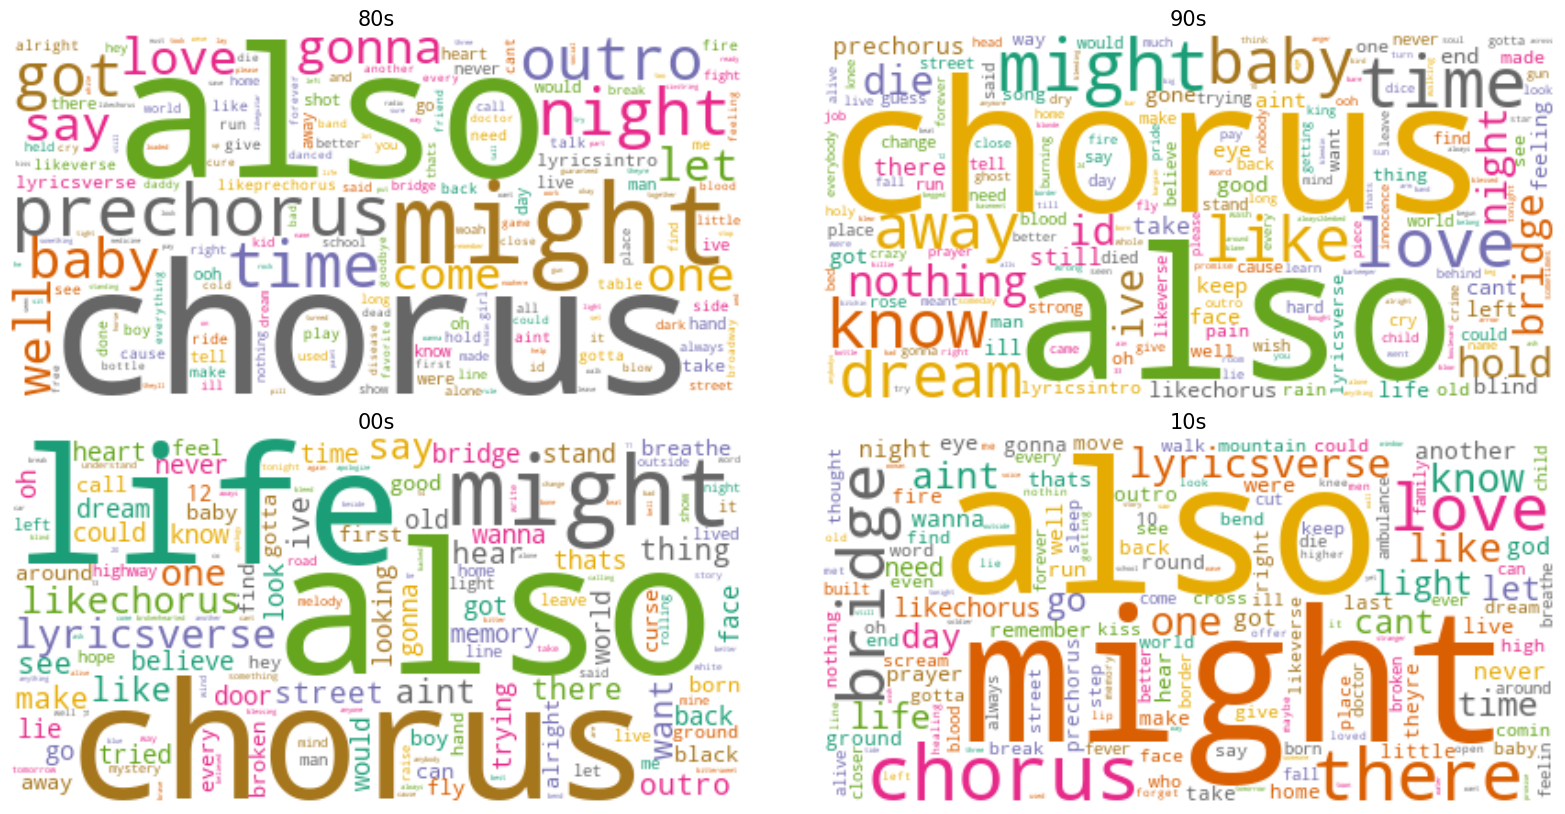

In [14]:
#Muestra el grafico comparando las 4 epocas 
plot_wordcloud(vect_words,2,2)

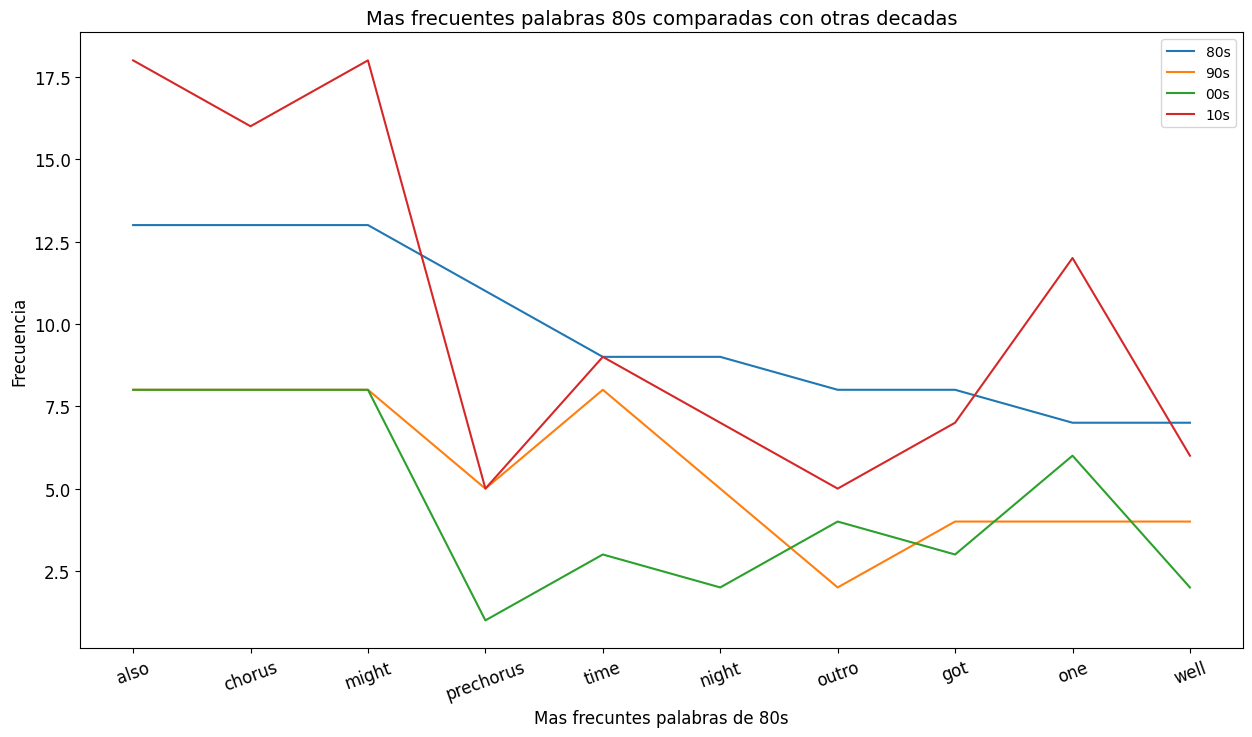

In [15]:
#Muestra 
plot_freq_words(vect_words,'80s',10)

In [32]:
#Función que muestra las palabras más comunes utilizadas por década
def unique_decade_words(df,decade,n_words):
    periods = []
    unique_words = []
    top_words = df.sort_values([decade],ascending=False).head(n_words).reset_index(drop=True)

    for d in top_words.columns[1:]:
        if d != decade:
            periods.append(d)

    for i in top_words.index:
        if top_words[periods[0]].iloc[i]<top_words[decade].min():
            if top_words[periods[1]].iloc[i]<top_words[decade].min():
                if top_words[periods[2]].iloc[i]<top_words[decade].min():
                    unique_words.append(top_words['words'].iloc[i])
    return unique_words

In [33]:
#Muestra las palabras unicas de la decada
unique_decade_words(vect_words,'80s',10)

['prechorus', 'outro', 'well']

In [34]:
#Análisis de sentimiento utilizando el modelo de intensidad de sentimiento VADER

#Crea listas para almacenar las diferentes puntuaciones de cada palabra
negative = []
neutral = []
positive = []
compound = []

#Inicializa el modelo
sid = SentimentIntensityAnalyzer()

#Iterar para cada fila de letras y agregar las partituras
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Crea 4 columnas en el marco de datos principal para cada puntaje
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [35]:
# Muestra el puntaje de cuales son la palabras negativas, positvas, netruales y el combinado
df.head()

,artist,title,decade,date,lyric,words,Negativo,Neutral,Positivo,Combinado,negative,neutral,positive,compound
0,Bon Jovi,Livin’ on a Prayer,80s,1986,84 contributorstranslationsportuguêslivin’ on ...,"[84, contributorstranslationsportuguêslivin’, ...",0.062,0.806,0.132,0.9858,0.062,0.806,0.132,0.9858
1,Bon Jovi,It’s My Life,00s,2000,54 contributorstranslationsportuguêsελληνικάit...,"[54, contributorstranslationsportuguêsελληνικά...",0.033,0.800,0.167,0.9879,0.033,0.800,0.167,0.9879
2,Bon Jovi,You Give Love a Bad Name,80s,1986,60 contributorstranslationsportuguêsyou give l...,"[60, contributorstranslationsportuguêsyou, giv...",0.196,0.484,0.320,0.9955,0.196,0.484,0.320,0.9955
3,Bon Jovi,Wanted Dead or Alive,80s,1986,36 contributorstranslationsportuguêswanted dea...,"[36, contributorstranslationsportuguêswanted, ...",0.215,0.655,0.130,-0.9889,0.215,0.655,0.130,-0.9889
4,Bon Jovi,Always,90s,1994,33 contributorstranslationsportuguêsελληνικάal...,"[33, contributorstranslationsportuguêsελληνικά...",0.154,0.767,0.078,-0.9906,0.154,0.767,0.078,-0.9906


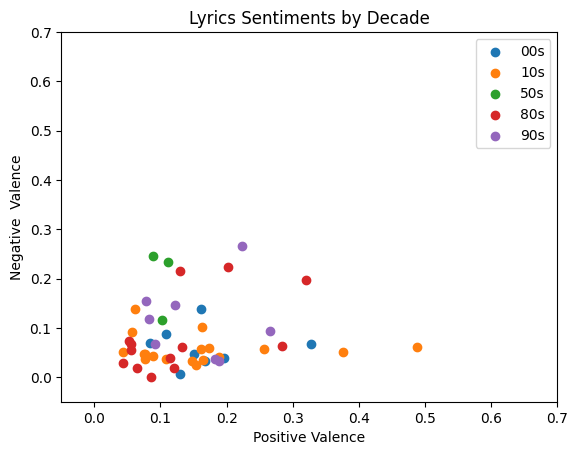

In [36]:
for name, group in df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [29]:
'''
means_df = df.groupby(['decade']).mean()
means_df.to_csv("df.csv")
means_df
'''

'\nmeans_df = df.groupby([\'decade\']).mean()\nmeans_df.to_csv("df.csv")\nmeans_df\n'

In [ ]:
'''
for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()
'''

'\nfor name, group in means_df.groupby(\'decade\'):\n    plt.scatter(group[\'positive\'],group[\'negative\'],label=name)\n    plt.legend()\n\nplt.xlim([-0.05,0.7])\nplt.ylim([-0.05,0.7])\nplt.title("Lyrics Sentiments by Decade")\nplt.xlabel(\'Positive Valence\')\nplt.ylabel(\'Negative  Valence\')\n\nplt.show()\n'

*********************************  MODELANDO ********************************

In [37]:
# Busca las palabras en el diccionario
words = df['words'].tolist()
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(text) for text in words]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [38]:
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=words, dictionary=dictionary, coherence='c_v')

print(f"Puntuación de coherencia:{coherence_model_lda.get_coherence()}")
print(f"Puntuación de perplejidad:{lda_model.log_perplexity(corpus)}")

Puntuación de coherencia:0.4192398396843804
Puntuación de perplejidad:-7.77520308581776


In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calcule la coherencia c_v para varios temas

    Parametros:
    ----------
    diccionario : diccionario Gensim
    corpus : Gensim corpus
    texts : Lista de textos de entrada
    limit: Número máximo de temas

    Devuelve:
    -------
    model_list : Lista de modelos de temas LDA
    coherence_values: valores de coherencia correspondientes al modelo LDA con el número respectivo de temas
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=words, start=10, limit=100, step=5)

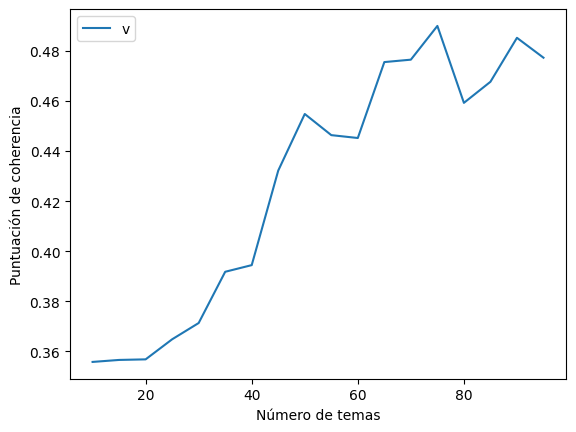

Número de temas = 10  tiene un valor de coherencia de 0.3558
Número de temas = 15  tiene un valor de coherencia de 0.3566
Número de temas = 20  tiene un valor de coherencia de 0.3568
Número de temas = 25  tiene un valor de coherencia de 0.3648
Número de temas = 30  tiene un valor de coherencia de 0.3713
Número de temas = 35  tiene un valor de coherencia de 0.3918
Número de temas = 40  tiene un valor de coherencia de 0.3944
Número de temas = 45  tiene un valor de coherencia de 0.4322
Número de temas = 50  tiene un valor de coherencia de 0.4548
Número de temas = 55  tiene un valor de coherencia de 0.4464
Número de temas = 60  tiene un valor de coherencia de 0.4452
Número de temas = 65  tiene un valor de coherencia de 0.4755
Número de temas = 70  tiene un valor de coherencia de 0.4765
Número de temas = 75  tiene un valor de coherencia de 0.49
Número de temas = 80  tiene un valor de coherencia de 0.4593
Número de temas = 85  tiene un valor de coherencia de 0.4677
Número de temas = 90  tien

In [41]:
#Grafia 
limit=100; start=10; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Número de temas")
plt.ylabel("Puntuación de coherencia")
plt.legend(("valores de coherencia"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Número de temas =", m, " tiene un valor de coherencia de", round(cv, 4))

In [42]:
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=55, id2word=dictionary)

In [ ]:
'''
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df['lyric'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)
'''

'\ndef format_topics_sentences(ldamodel, corpus, texts):\n    # Init output\n    sent_topics_df = pd.DataFrame()\n\n    # Get main topic in each document\n    for i, row in enumerate(ldamodel[corpus]):\n        row = sorted(row, key=lambda x: (x[1]), reverse=True)\n        # Get the Dominant topic, Perc Contribution and Keywords for each document\n        for j, (topic_num, prop_topic) in enumerate(row):\n            if j == 0:  # => dominant topic\n                wp = ldamodel.show_topic(topic_num)\n                topic_keywords = ", ".join([word for word, prop in wp])\n                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)\n            else:\n                break\n    sent_topics_df.columns = [\'Dominant_Topic\', \'Perc_Contribution\', \'Topic_Keywords\']\n\n    # Add original text to the end of the output\n    contents = pd.Series(texts)\n    sent_topics_df = pd.concat([sent_topics_df, contents],